## Scénario
Aujourd’hui est un grand jour, vous commencez votre mission chez BottleNeck, un marchand de vin très prestigieux. 
Le responsable du projet vous explique les enjeux de votre première mission :

 “Actuellement, pour gérer nos ressources, nos clients, etc., on utilise un ERP qui n’est absolument pas relié à notre site de vente en ligne. Pour être tout à fait honnête, les outils en place sont vraiment artisanaux et dans ces conditions, la gestion des stocks est vraiment complexe et notre visibilité en termes d’analyse des ventes sur le Net est vraiment réduite, car très peu de personnes ont accès au back-office. En attendant une solution plus centralisée, un rapprochement entre les 2 bases, même manuel, pourrait être très utile…

Ta première mission se passe en 3 points.

* Premièrement, j’ai besoin que tu rapproches deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...), il sont présentées pers les deux fichiers (1.xls, 2.xlsx). En plus de ces 2 exports, tu vas bénéficier d’une aide précieuse car Sylvie, notre ancienne stagiaire, a réalisé un travail de fourmi. Elle a créé un tableau Excel qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU) les données sont présentées par le fichier 3.xls ( En fait, la colonne id_web dans son fichier correspond au SKU des produits dans la boutique en ligne.)

* Deuxièmement, une fois le rapprochement effectué, je souhaiterais avoir le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

* Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix des produits. J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

**Nous voudrions présenter tes résultats lors de la prochaine réunion de COPIL. Cela permettrait de montrer nos progrès. Je peux t’épargner le travail d’une présentation par slides, il me faut juste un notebook que tu présenteras à l’assemblée pour expliquer ta démarche.**”

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [3]:
# Read  Excel files
product = pd.read_excel('data/1.xlsx')
web = pd.read_excel('data/2.xlsx')
sku = pd.read_excel('data/3.xlsx')

C:\Users\utilisateur\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


### Merge files

In [4]:
merge_web = pd.merge(product, web, on="product_id")

In [5]:
merge_web.rename({'id_web': 'sku'}, axis=1, inplace=True)

In [6]:
df = pd.merge(merge_web, sku, on='sku')

In [7]:
df.shape

(9163, 33)

### drop duplicated

In [8]:
df.duplicated('product_id').sum()

8358

In [9]:
df = df.drop_duplicates('product_id')

In [10]:
df.duplicated('sku').sum()

90

In [11]:
df = df.drop_duplicates('sku')

df.duplicated('product_id').sum()

In [12]:
df.shape

(715, 33)

### Chiffre d'affaire

In [13]:
df.head()

product_id  onsale_web  price  stock_quantity stock_status    sku  virtual  \
0        3847           1   24.2               0   outofstock  15298        0   
2        3849           1   34.3               0   outofstock  15296        0   
4        3850           1   20.8               0   outofstock  15300        0   
6        4032           1   14.1               0   outofstock  19814        0   
8        4039           1   46.0               0   outofstock  19815        0   

   downloadable  rating_count  average_rating  ...  \
0             0             0             0.0  ...   
2             0             0             0.0  ...   
4             0             0             0.0  ...   
6             0             0             0.0  ...   
8             0             0             0.0  ...   

                                           post_name       post_modified  \
0        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 09:30:29   
2          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 09:00:17   
4  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 18:15:03   
6                  pierre-jean-villa-igp-gamine-2018 2020-01-04 16:36:01   
8          pierre-jean-villa-cote-rotie-carmina-2017 2020-01-04 16:36:10   

    post_modified_gmt  post_content_filtered post_parent  \
0 2019-12-30 08:30:29                    NaN         0.0   
2 2019-12-21 08:00:17                    NaN         0.0   
4 2020-06-26 16:15:03                    NaN         0.0   
6 2020-01-04 15:36:01                    NaN         0.0   
8 2020-01-04 15:36:10                    NaN         0.0   

                                                guid  menu_order post_type  \
0  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
2  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
4  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
6  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   
8  https://www.bottle-neck.fr/?post_type=product&...         0.0   product   

  post_mime_type comment_count  
0            NaN           0.0  
2            NaN           0.0  
4            NaN           0.0  
6            NaN           0.0  
8            NaN           0.0  

[5 rows x 33 columns]

In [14]:
df['vente_produit'] = df['price'] * df['total_sales']

In [15]:
ca = df['vente_produit'].sum()
print(f"Le chiffre d'affaire total est de {ca}")

Le chiffre d'affaire total est de 70568.6


In [16]:
df.to_excel("data/BottleNeck.xlsx",sheet_name='BottleNeck',index=False)

In [17]:
bn = pd.read_excel('data/BottleNeck.xlsx',index_col=False)

In [18]:
bn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             715 non-null    int64         
 1   onsale_web             715 non-null    int64         
 2   price                  715 non-null    float64       
 3   stock_quantity         715 non-null    int64         
 4   stock_status           715 non-null    object        
 5   sku                    714 non-null    object        
 6   virtual                715 non-null    int64         
 7   downloadable           715 non-null    int64         
 8   rating_count           715 non-null    int64         
 9   average_rating         714 non-null    float64       
 10  total_sales            714 non-null    float64       
 11  tax_status             714 non-null    object        
 12  tax_class              0 non-null      float64       
 13  post_

### isna

In [19]:
(bn.isna().sum() /bn.shape[0] )*100

product_id                 0.00000
onsale_web                 0.00000
price                      0.00000
stock_quantity             0.00000
stock_status               0.00000
sku                        0.13986
virtual                    0.00000
downloadable               0.00000
rating_count               0.00000
average_rating             0.13986
total_sales                0.13986
tax_status                 0.13986
tax_class                100.00000
post_author                0.13986
post_date                  0.13986
post_date_gmt              0.13986
post_content             100.00000
post_title                 0.13986
post_excerpt               0.13986
post_status                0.13986
comment_status             0.13986
ping_status                0.13986
post_password            100.00000
post_name                  0.13986
post_modified              0.13986
post_modified_gmt          0.13986
post_content_filtered    100.00000
post_parent                0.13986
guid                

<AxesSubplot:>

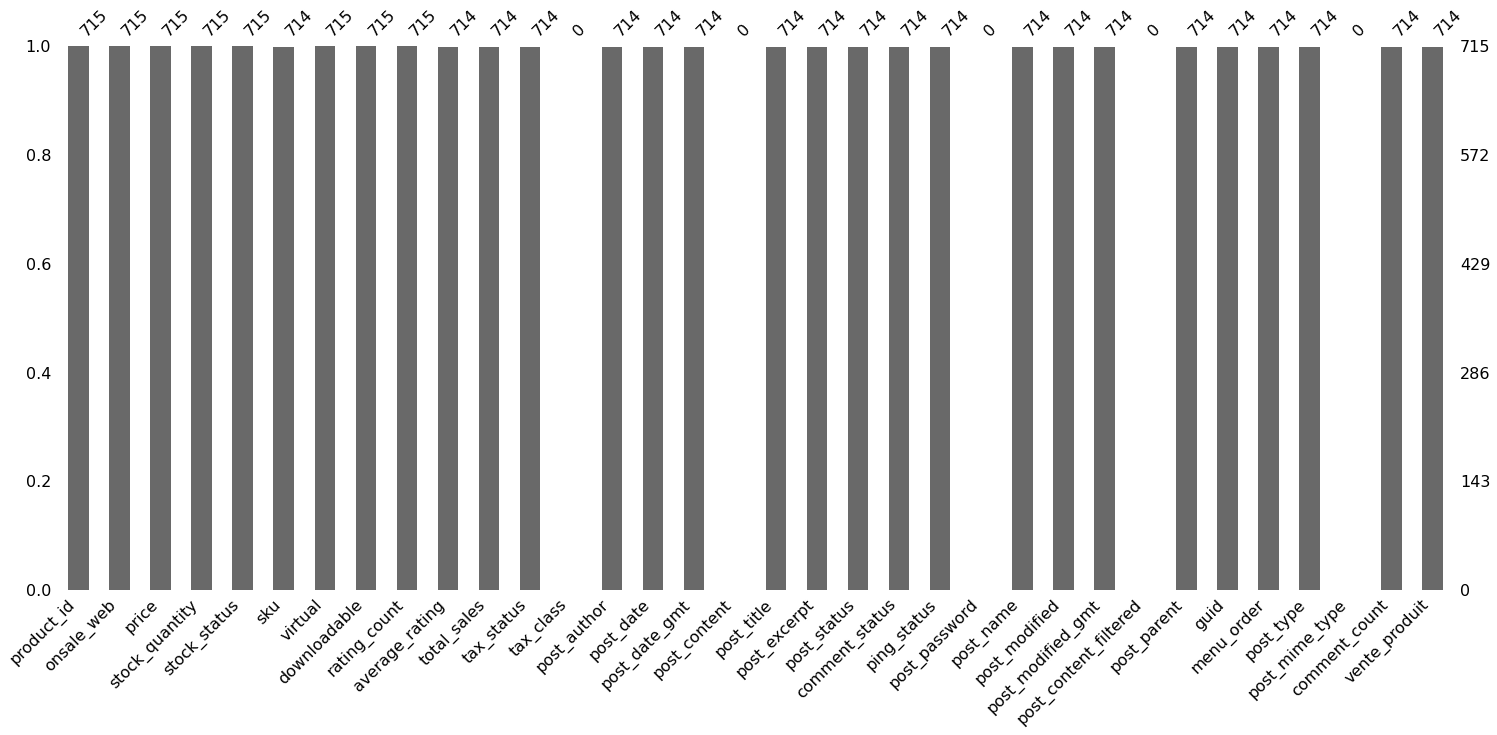

In [20]:
msno.bar(bn)

In [21]:
bn.describe()

product_id  onsale_web       price  stock_quantity  virtual  \
count   715.000000  715.000000  715.000000      715.000000    715.0   
mean   5031.190210    0.998601   32.568112       28.706294      0.0   
std     790.802603    0.037398   27.863259       47.991017      0.0   
min    3847.000000    0.000000    5.200000        0.000000      0.0   
25%    4278.500000    1.000000   14.100000        2.000000      0.0   
50%    4795.000000    1.000000   23.600000       12.000000      0.0   
75%    5710.000000    1.000000   42.200000       35.000000      0.0   
max    7338.000000    1.000000  225.000000      578.000000      0.0   

       downloadable  rating_count  average_rating  total_sales  tax_class  \
count         715.0         715.0           714.0   714.000000        0.0   
mean            0.0           0.0             0.0     4.012605        NaN   
std             0.0           0.0             0.0     8.518183        NaN   
min             0.0           0.0             0.0     0.000000        NaN   
25%             0.0           0.0             0.0     0.000000        NaN   
50%             0.0           0.0             0.0     1.000000        NaN   
75%             0.0           0.0             0.0     4.000000        NaN   
max             0.0           0.0             0.0    96.000000        NaN   

       post_author  post_content  post_password  post_content_filtered  \
count   714.000000           0.0            0.0                    0.0   
mean      1.998599           NaN            NaN                    NaN   
std       0.037424           NaN            NaN                    NaN   
min       1.000000           NaN            NaN                    NaN   
25%       2.000000           NaN            NaN                    NaN   
50%       2.000000           NaN            NaN                    NaN   
75%       2.000000           NaN            NaN                    NaN   
max       2.000000           NaN            NaN                    NaN   

       post_parent  menu_order  post_mime_type  comment_count  vente_produit  
count        714.0       714.0             0.0          714.0     714.000000  
mean           0.0         0.0             NaN            0.0      98.835574  
std            0.0         0.0             NaN            0.0     307.685071  
min            0.0         0.0             NaN            0.0       0.000000  
25%            0.0         0.0             NaN            0.0       0.000000  
50%            0.0         0.0             NaN            0.0      15.250000  
75%            0.0         0.0             NaN            0.0      91.150000  
max            0.0         0.0             NaN            0.0    4704.000000

Text(0, 0.5, 'Prices')

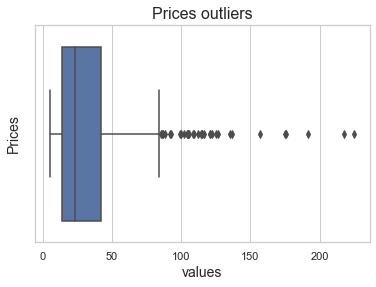

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=bn["price"])
ax.axes.set_title("Prices outliers", fontsize=16)
ax.set_xlabel("values", fontsize=14)
ax.set_ylabel("Prices", fontsize=14)

<AxesSubplot:xlabel='price', ylabel='Count'>

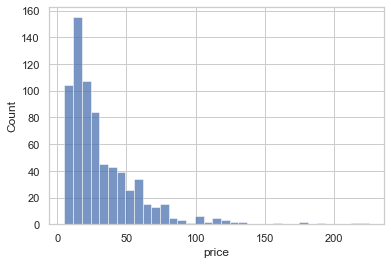

In [23]:
sns.histplot(bn['price'],linewidth=.5)

Après l'études des différents prix, il est difficile de trouver des **Outliers aberrant** étant donné que les seuls outliers sont des valeurs **atypiques**.

## Conclusion

Nous pouvons conclure notre étude comme quoi l'ensemble des prix semble correct. Si nous voulons poursuivre l'étude, il serait pertinent de faire différents graphiques sur l'évolution du chiffre d'affaires et le nombre de ventes sur les nouveaux produits ainsi qu'un nettoyage du Dataframe à son maximum.